# Known Cancer Predisposition Genes, without autosomal recessive genes for Osteosarcoma
----- 
- Date : 17th May 2019
- using R3.5 kernal
- on 89

In [1]:
source("~/bin/da.R")

In [2]:
suppressPackageStartupMessages({
    library(tidyverse) 
    library(vcd)
    library(readr)
    library(maftools)
    library(corrplot)
    library(knitr)
    library(wordcloud)
    library(RColorBrewer)})

In [3]:
packageVersion("maftools")

[1] ‘1.8.0’

## Muataional Data

In [4]:
file_name="../KCPG_Variants/data/Mutation_data_cleaned_051019.xls"

In [5]:
df= readxl::read_excel(file_name)

In [6]:
df %>% dim

[1] 3016   84

In [7]:
knitr::kable( sort( table(df$Tumor_types ),decreasing = T), format="pandoc")



Var1     Freq
------  -----
CNS       613
WLM       405
NBL       343
RHB       259
OS        241
HGG       229
RB        221
EWS       192
STS       177
GCT       139
ACT        79
LGG        52
CA         35
OST        18
RCC         5
GICT        2
LMPRT       2
PGL         2
BCC         1
NM          1

In [8]:
cbind( df$Known_Cancer_Predisposition_Genes %>% table )

known,290
suggesting,2726


In [9]:
df = df[df$Known_Cancer_Predisposition_Genes == 'known',]
df =droplevels(df)

In [10]:
df%>% dim

[1] 290  84

In [11]:
df$Mode_of_Inheritance_abb %>% table

.
   AD    AR AR/AD   XLD 
  153    92    43     2 

In [12]:
table(df$Mode_of_Inheritance_abb , df$genotype)

       
        Het Hom
  AD    153   0
  AR     92   0
  AR/AD  43   0
  XLD     1   1

## Remove AR

In [13]:
df = df[df$Mode_of_Inheritance_abb != 'AR',]
df = droplevels(df)

In [14]:
df %>% dim

[1] 198  84

In [15]:
# sanity check
df$Mode_of_Inheritance_abb %>% table

.
   AD AR/AD   XLD 
  153    43     2 

In [16]:
len( unique(df$Tumor_Sample_Barcode) )

[1] 182

In [17]:
len( unique(df$Hugo_Symbol) )

[1] 54

## EDA Clinical_Data

In [18]:
file_name_clinical = "../KCPG_Variants/data/Combined_Clinical_Data_03.xlsx"

In [19]:
df2 = readxl::read_excel( file_name_clinical )

In [20]:
colnames(df2)

[1] "Tumor_Sample_Barcode" "Tumor_type"           "Tumor_type2"         
 [4] "Age_of_Onset"         "Sex"                  "Age_group"           
 [7] "sample_type"          "sequencing_type"      "Access_unit"         
[10] "Status"               "Ethnicity"            "Race"

In [21]:
table(df2$Tumor_type , df2$Access_unit )

                                      
                                       CCF PCGP SJLIFE
  Adrenocortical Carcinoma               1   19      2
  Basal Cell Carcinoma                   0    0      1
  Carcinoma                              0    0     14
  Central Nervous System                 1    0    322
  Ewing's Sarcoma                        6    0     89
  Germ Cell Tumor                        1    0     73
  Giant Cell Tumor                       0    0      3
  High Grade Glioma                      5   75      0
  Low Grade Glioma                       2   15      7
  Low Malignant Potential Renal Tumors   2    0      0
  Neuroblastoma                          3   48    139
  Non-Malignant Tumor                    1    0      3
  Osteosarcoma                          14    2    113
  Other Solid Tumor                      0    0     10
  Paraganglioma                          0    0      1
  Renal Cell Carcinoma                   1    0      2
  Retinoblastoma          

In [22]:
fct_count( df2$Tumor_type , sort = T)

f,n
Central Nervous System,323
Wilms' tumor,207
Neuroblastoma,190
Rhabdomyosarcoma,134
Osteosarcoma,129
Retinoblastoma,98
Ewing's Sarcoma,95
Soft Tissue Sarcoma,93
High Grade Glioma,80
Germ Cell Tumor,74


In [23]:
## sanity check
table(df2$Tumor_type , df2$Tumor_type2 )

                                      
                                       ACT BCC  CA CNS EWS GCT GICT HGG LGG
  Adrenocortical Carcinoma              22   0   0   0   0   0    0   0   0
  Basal Cell Carcinoma                   0   1   0   0   0   0    0   0   0
  Carcinoma                              0   0  14   0   0   0    0   0   0
  Central Nervous System                 0   0   0 323   0   0    0   0   0
  Ewing's Sarcoma                        0   0   0   0  95   0    0   0   0
  Germ Cell Tumor                        0   0   0   0   0  74    0   0   0
  Giant Cell Tumor                       0   0   0   0   0   0    3   0   0
  High Grade Glioma                      0   0   0   0   0   0    0  80   0
  Low Grade Glioma                       0   0   0   0   0   0    0   0  24
  Low Malignant Potential Renal Tumors   0   0   0   0   0   0    0   0   0
  Neuroblastoma                          0   0   0   0   0   0    0   0   0
  Non-Malignant Tumor                    0   0   

In [24]:
## sanity check
df %>% dim
df2 %>% dim

[1] 198  84

[1] 1507   12

In [25]:
ttype ="Osteosarcoma"

In [26]:
df2_ss = df2[df2$Tumor_type == ttype,]
ss =df$Tumor_Sample_Barcode %in% intersect( df$Tumor_Sample_Barcode, unique( df2_ss$Tumor_Sample_Barcode ))
df_ss = df[ ss, ]
df_ss = droplevels(df_ss)
df2_ss = droplevels(df2_ss)

In [27]:
df_ss$Hugo_Symbol=as.character(df_ss$Hugo_Symbol) 

In [28]:
table(df2_ss$Tumor_type , df2_ss$Tumor_type2 )

              
                OS
  Osteosarcoma 129

In [29]:
setdiff( df_ss$Tumor_Sample_Barcode, df2_ss$Tumor_Sample_Barcode)

character(0)

In [30]:
cbind(dim(df_ss), dim(df2_ss))

13,129
84,12


## Creating a MAF object

In [35]:
dfx = read.maf(maf=df_ss,clinicalData = df2_ss, isTCGA = FALSE, verbose = T, removeDuplicatedVariants = FALSE, useAll = TRUE )

Summarizing..
NOTE: Mutiple reference builds found!
37;38


                   ID summary  Mean Median
 1:        NCBI_Build   37;38    NA     NA
 2:            Center    <NA>    NA     NA
 3:           Samples      12    NA     NA
 4:            nGenes      10    NA     NA
 5:   Frame_Shift_Del       3 0.250      0
 6:   Frame_Shift_Ins       1 0.083      0
 7:      In_Frame_Del       1 0.083      0
 8: Missense_Mutation       3 0.250      0
 9: Nonsense_Mutation       4 0.333      0
10:       Splice_Site       1 0.083      0
11:             total      13 1.083      1


Gene Summary..


    Hugo_Symbol Frame_Shift_Del Frame_Shift_Ins In_Frame_Del Missense_Mutation
 1:         ATM               0               0            1                 1
 2:        GJB2               2               0            0                 0
 3:       RECQL               0               0            0                 0
 4:       BRCA2               0               1            0                 0
 5:       BRIP1               0               0            0                 0
 6:        CDH1               0               0            0                 1
 7:       CHEK2               1               0            0                 0
 8:      CREBBP               0               0            0                 1
 9:         RB1               0               0            0                 0
10:        TP53               0               0            0                 0
    Nonsense_Mutation Splice_Site total MutatedSamples AlteredSamples
 1:                 0           0     2              2       

Checking clinical data..
Done !


In [36]:
dfx@summary

ID,summary,Mean,Median
NCBI_Build,37;38,NA,NA
Center,NA,NA,NA
Samples,12,NA,NA
nGenes,10,NA,NA
Frame_Shift_Del,3,0.250,0
Frame_Shift_Ins,1,0.083,0
In_Frame_Del,1,0.083,0
Missense_Mutation,3,0.250,0
Nonsense_Mutation,4,0.333,0
Splice_Site,1,0.083,0


In [33]:
dfx@gene.summary %>% head

Hugo_Symbol,Frame_Shift_Del,Frame_Shift_Ins,Missense_Mutation,Nonsense_Mutation,Splice_Site,total,MutatedSamples,AlteredSamples
NF1,0,0,1,1,0,2,2,2
ATM,0,0,1,0,0,1,1,1
ATR,0,0,0,1,0,1,1,1
BRCA2,0,0,0,0,1,1,1,1
CHEK2,1,0,0,0,0,1,1,1
COL7A1,1,0,0,0,0,1,1,1


# Number of unique genes after making MAF file

In [37]:
dfx@gene.summary %>% dim

[1] 10 10

### Samples with top variants

In [38]:
knitr::kable( dfx@variant.type.summary %>% head,format = "pandoc")



Tumor_Sample_Barcode    DEL   INS   SNP   total
---------------------  ----  ----  ----  ------
CCF12237                  0     1     1       2
CCF11829                  1     0     0       1
SJOS017932                0     0     1       1
SJOS018800                0     0     1       1
SJOS018803                1     0     0       1
SJOS018816                0     0     1       1

In [39]:
knitr::kable( dfx@variants.per.sample %>% head,format = "pandoc")



Tumor_Sample_Barcode    Variants
---------------------  ---------
CCF12237                       2
CCF11829                       1
SJOS017932                     1
SJOS018800                     1
SJOS018803                     1
SJOS018816                     1

### Number of Genes with 2 or more mutations

In [40]:
gs = as.data.frame( dfx@gene.summary )  
gf_sx = nrow( gs[ gs$MutatedSamples >= 2,] )
gf_sx

[1] 3

In [41]:
total_genes=length(gs$Hugo_Symbol)

In [42]:
total_genes

[1] 10

In [46]:
gs

Hugo_Symbol,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,Missense_Mutation,Nonsense_Mutation,Splice_Site,total,MutatedSamples,AlteredSamples
ATM,0,0,1,1,0,0,2,2,2
GJB2,2,0,0,0,0,0,2,2,2
RECQL,0,0,0,0,2,0,2,2,2
BRCA2,0,1,0,0,0,0,1,1,1
BRIP1,0,0,0,0,0,1,1,1,1
CDH1,0,0,0,1,0,0,1,1,1
CHEK2,1,0,0,0,0,0,1,1,1
CREBBP,0,0,0,1,0,0,1,1,1
RB1,0,0,0,0,1,0,1,1,1
TP53,0,0,0,0,1,0,1,1,1


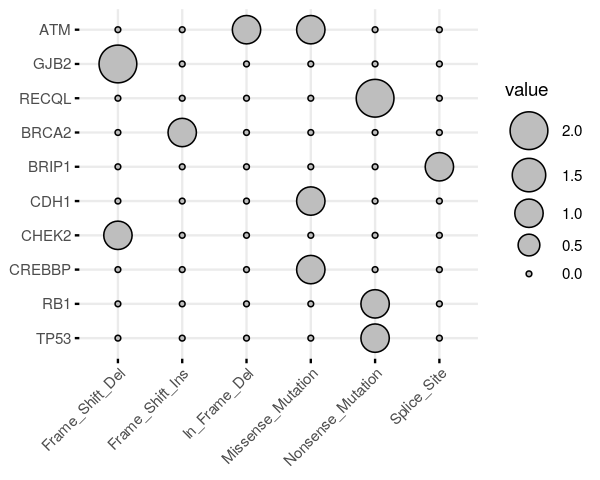

In [68]:
gs_mat = gs %>% dplyr::select(Frame_Shift_Del, Frame_Shift_Ins, In_Frame_Del, Missense_Mutation, Nonsense_Mutation, Splice_Site )
rownames(gs_mat)=gs$Hugo_Symbol
options(repr.plot.height=4)
ggballoonplot(gs_mat)

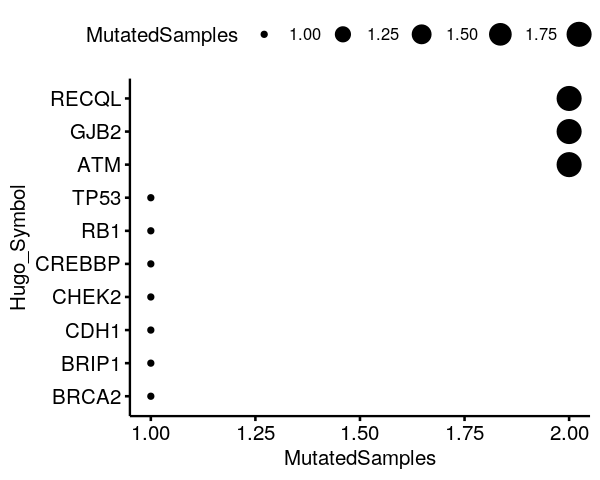

In [69]:
options(repr.plot.width=5, repr.plot.height=4)
gs %>% ggdotchart("Hugo_Symbol","MutatedSamples", 
                  rotate = TRUE,
                  sorting = "descending",
                  show.label = F,size = "MutatedSamples", 
                  ggtheme = theme_pubr() )

### plotmafSummary
to plot the summary of the maf file, which displays number of variants in each sample as a stacked barplot and variant types as a boxplot summarized by Variant_Classification.

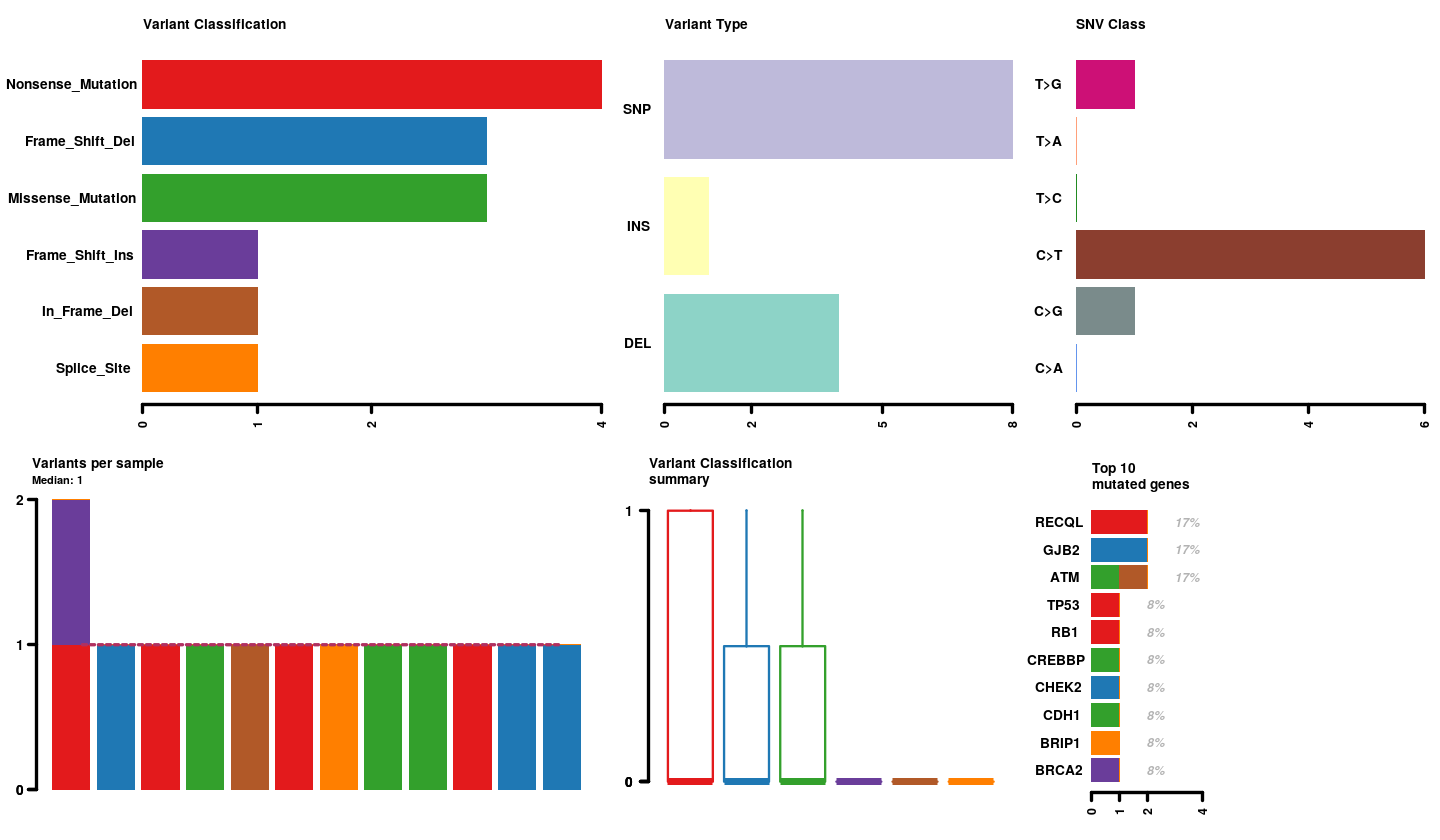

In [70]:
options(repr.plot.width=12, repr.plot.height=7)
plotmafSummary(maf=dfx, rmOutlier=F ,dashboard=TRUE,addStat='median', textSize=2,top=total_genes, showBarcodes=F )

In [71]:
options(repr.plot.width=12, repr.plot.height=7)
out_svg = paste0('../KCPG_Variants/plots/KCP_wo_AR_','TT-',gsub("'","", gsub(' ','_',ttype)),'_plotmafsummary_01.svg')
paste0("Saving : ", out_svg)
svg(out_svg, height=7, width=12)
plotmafSummary(maf=dfx, rmOutlier=F ,dashboard=TRUE,addStat='median', textSize=2,top=total_genes, showBarcodes=F )
dev.off()

[1] "Saving : ../KCPG_Variants/plots/KCP_wo_AR_TT-Osteosarcoma_plotmafsummary_01.svg"

png 
  2

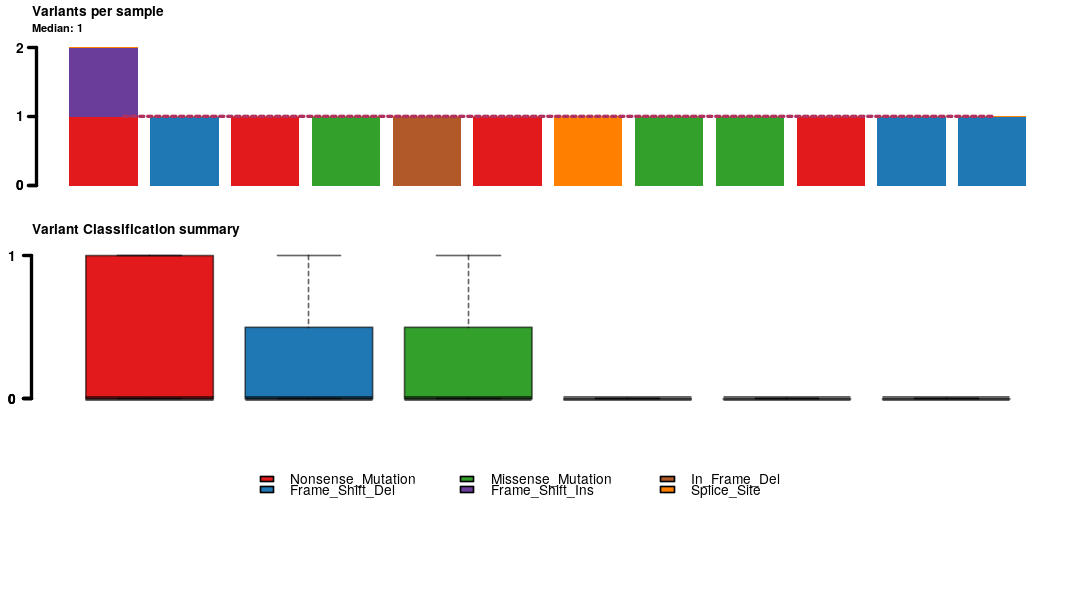

In [72]:
options(repr.plot.width=9, repr.plot.height=5)
plotmafSummary(maf = dfx, rmOutlier = FALSE ,dashboard = F,addStat = 'median', textSize = 2, top = gf_sx, showBarcodes=F )

### Oncoplots or waterfall plots
- Adding Clinical Data on oncoplot

### Make Oncoplots with the total genes from the gene summary

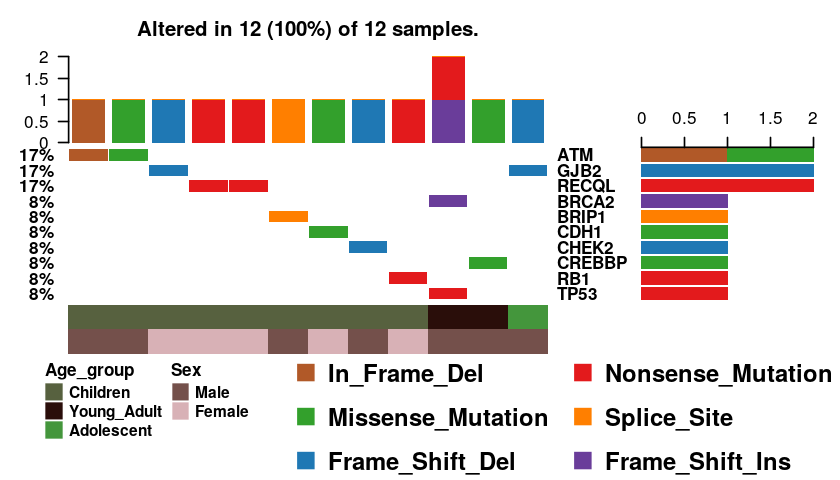

In [77]:
options(repr.plot.height=4,repr.plot.width=7)
oncoplot(maf = dfx,bgCol = "white",
        top = total_genes,
        
        fontSize = 10,
        SampleNamefontSize = 8,
        titleFontSize = 12,
        legendFontSize = 14,
        annotationTitleFontSize = 10,
        annotationFontSize = 9,
        
        drawColBar = TRUE,
        drawRowBar = TRUE,
        showTumorSampleBarcodes = F,
        sortByAnnotation = TRUE,
        writeMatrix = FALSE,
        clinicalFeatures = c("Age_group","Sex"))

In [79]:
out_svg = paste0('../KCPG_Variants/plots/KCP_wo_AR_','TT-',gsub("'","", gsub(' ','_',ttype)),'_oncoplot_01.svg')
paste0("Saving : ", out_svg)
svg(out_svg, height=7, width=9)

oncoplot(maf = dfx,bgCol = "white",
        top = total_genes,
        
        fontSize = 10,
        SampleNamefontSize = 8,
        titleFontSize = 12,
        legendFontSize = 14,
        annotationTitleFontSize = 10,
        annotationFontSize = 9,
        
        drawColBar = TRUE,
        drawRowBar = TRUE,
        showTumorSampleBarcodes = F,
        sortByAnnotation = TRUE,
        writeMatrix = FALSE,
        clinicalFeatures = c("Age_group","Sex"))
dev.off()

[1] "Saving : ../KCPG_Variants/plots/KCP_wo_AR_TT-Osteosarcoma_oncoplot_01.svg"

png 
  2

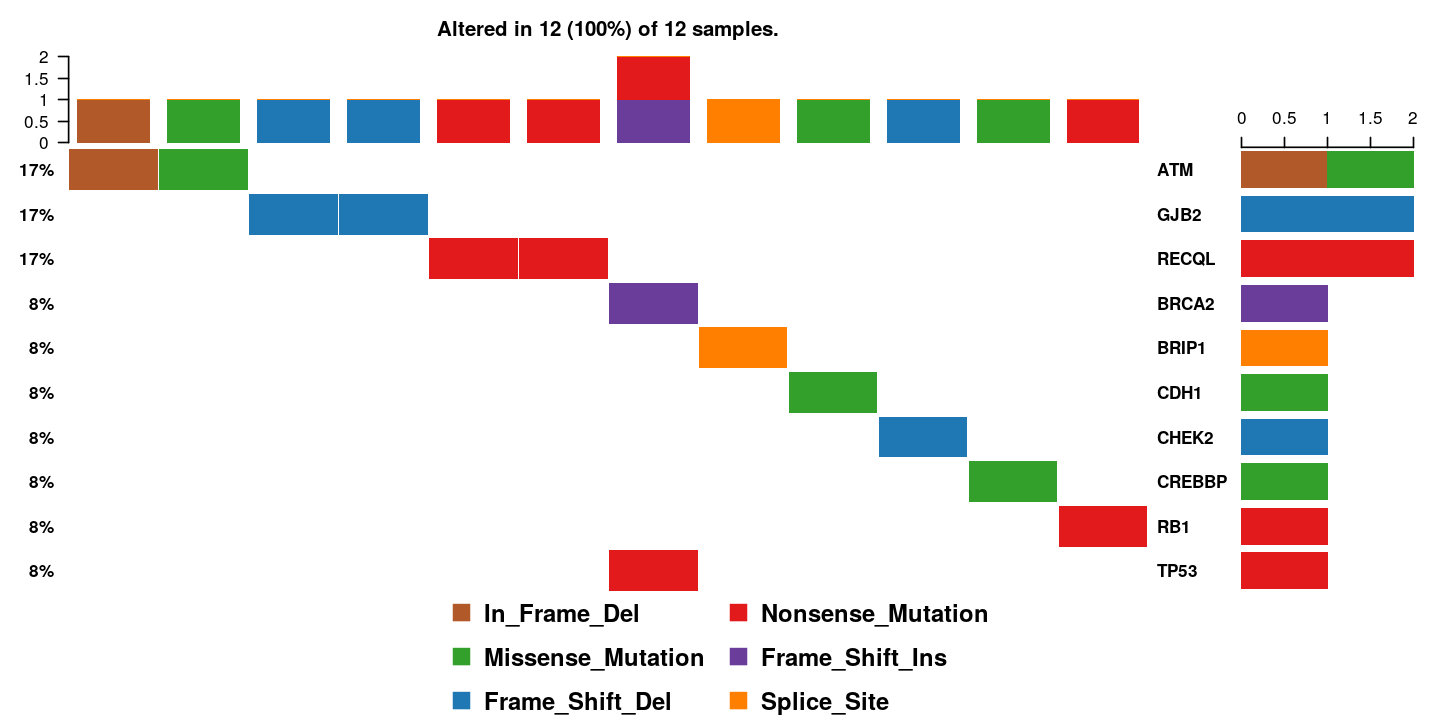

In [80]:
options(repr.plot.width=12, repr.plot.height=6)
oncoplot(maf = dfx,bgCol = "white",
        top = total_genes,
        
        fontSize = 10,
        SampleNamefontSize = 8,
        titleFontSize = 12,
        legendFontSize = 14,
        annotationTitleFontSize = 10,
        annotationFontSize = 9,
        
        drawColBar = TRUE,
        drawRowBar = TRUE,
        showTumorSampleBarcodes = F,
        writeMatrix = FALSE)

In [81]:
out_svg = paste0('../KCPG_Variants/plots/KCP_wo_AR_','TT-',gsub("'","", gsub(' ','_',ttype)),'_oncoplot_02.svg')
paste0("Saving : ", out_svg)
svg(out_svg, height=7, width=9)

oncoplot(maf = dfx,bgCol = "white",
        top = total_genes,
        
        fontSize = 10,
        SampleNamefontSize = 8,
        titleFontSize = 12,
        legendFontSize = 14,
        annotationTitleFontSize = 10,
        annotationFontSize = 9,
        
        drawColBar = TRUE,
        drawRowBar = TRUE,
        showTumorSampleBarcodes = F,
        writeMatrix = FALSE)
dev.off()

[1] "Saving : ../KCPG_Variants/plots/KCP_wo_AR_TT-Osteosarcoma_oncoplot_02.svg"

png 
  2

### Plot Transition and Transversions
returns a list of summarized tables in various ways. Summarized data can also be visualized as a boxplot showing overall distribution of six different conversions and as a stacked barplot showing fraction of conversions in each sample.

In [82]:
dfx

An object of class  MAF 
                   ID summary  Mean Median
 1:        NCBI_Build   37;38    NA     NA
 2:            Center    <NA>    NA     NA
 3:           Samples      12    NA     NA
 4:            nGenes      10    NA     NA
 5:   Frame_Shift_Del       3 0.250      0
 6:   Frame_Shift_Ins       1 0.083      0
 7:      In_Frame_Del       1 0.083      0
 8: Missense_Mutation       3 0.250      0
 9: Nonsense_Mutation       4 0.333      0
10:       Splice_Site       1 0.083      0
11:             total      13 1.083      1

NULL

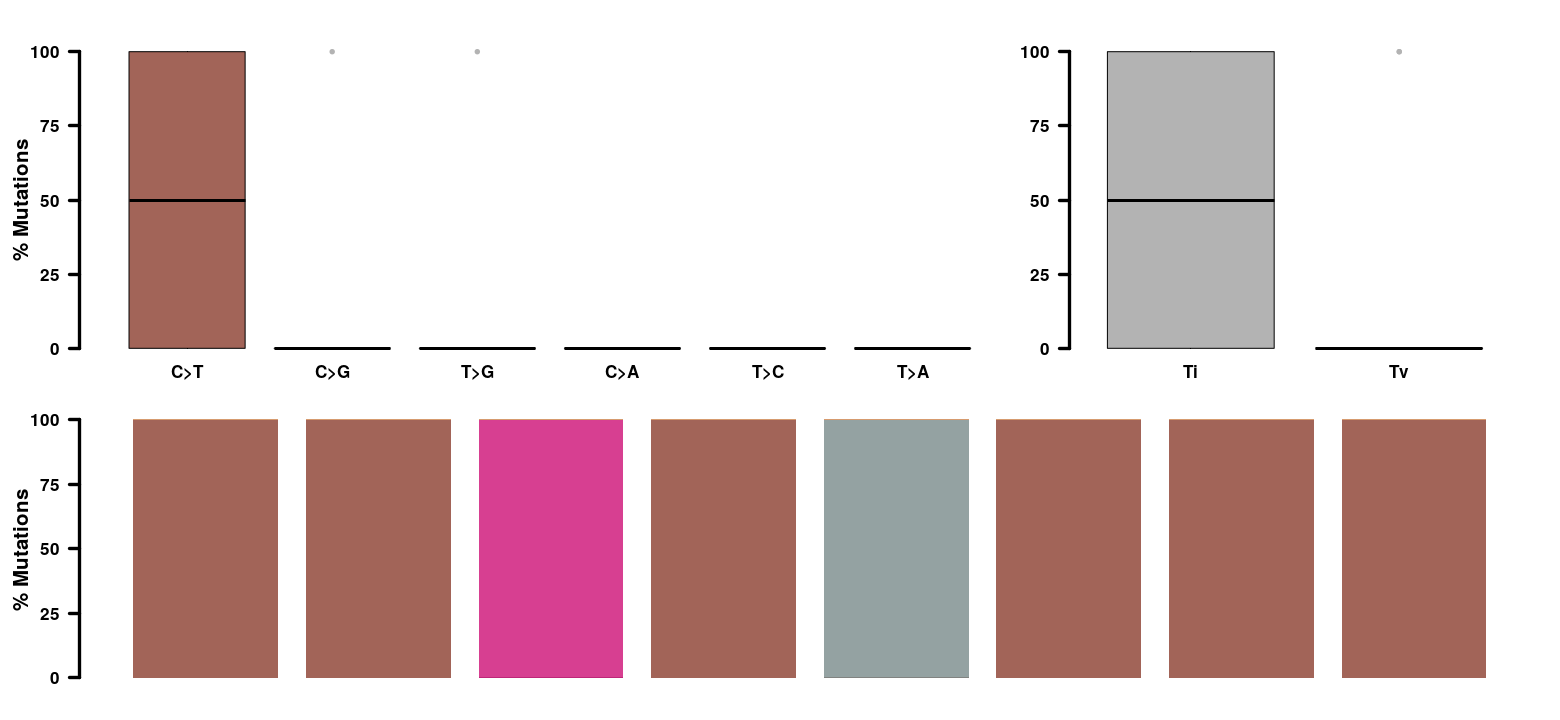

In [83]:
options(repr.plot.width=13,repr.plot.height=6)
dfx.titv = titv(maf = dfx, plot = F, useSyn = T  )
plotTiTv(res = dfx.titv ,showBarcodes = F, textSize=5)

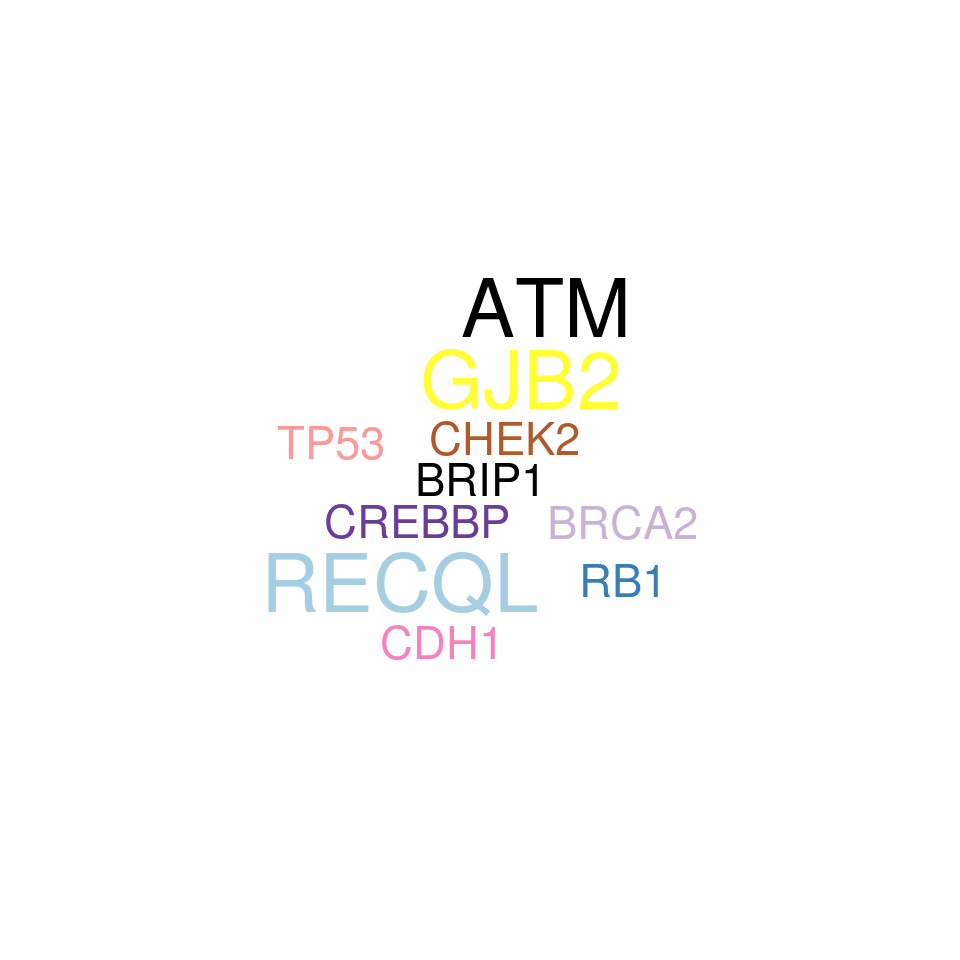

In [87]:
options(repr.plot.width=8, repr.plot.height=8)
set.seed(42)
geneCloud(input = dfx, min=0)

In [90]:
out_svg = paste0('../KCPG_Variants/plots/KCP_wo_AR_','TT-',gsub("'","", gsub(' ','_',ttype)),'_genecloud_01.svg')
paste0("Saving : ", out_svg)
svg(out_svg, height=8, width=8)
set.seed(42)
geneCloud(input = dfx, min=0)
dev.off()

[1] "Saving : ../KCPG_Variants/plots/KCP_wo_AR_TT-Osteosarcoma_genecloud_01.svg"

png 
  2

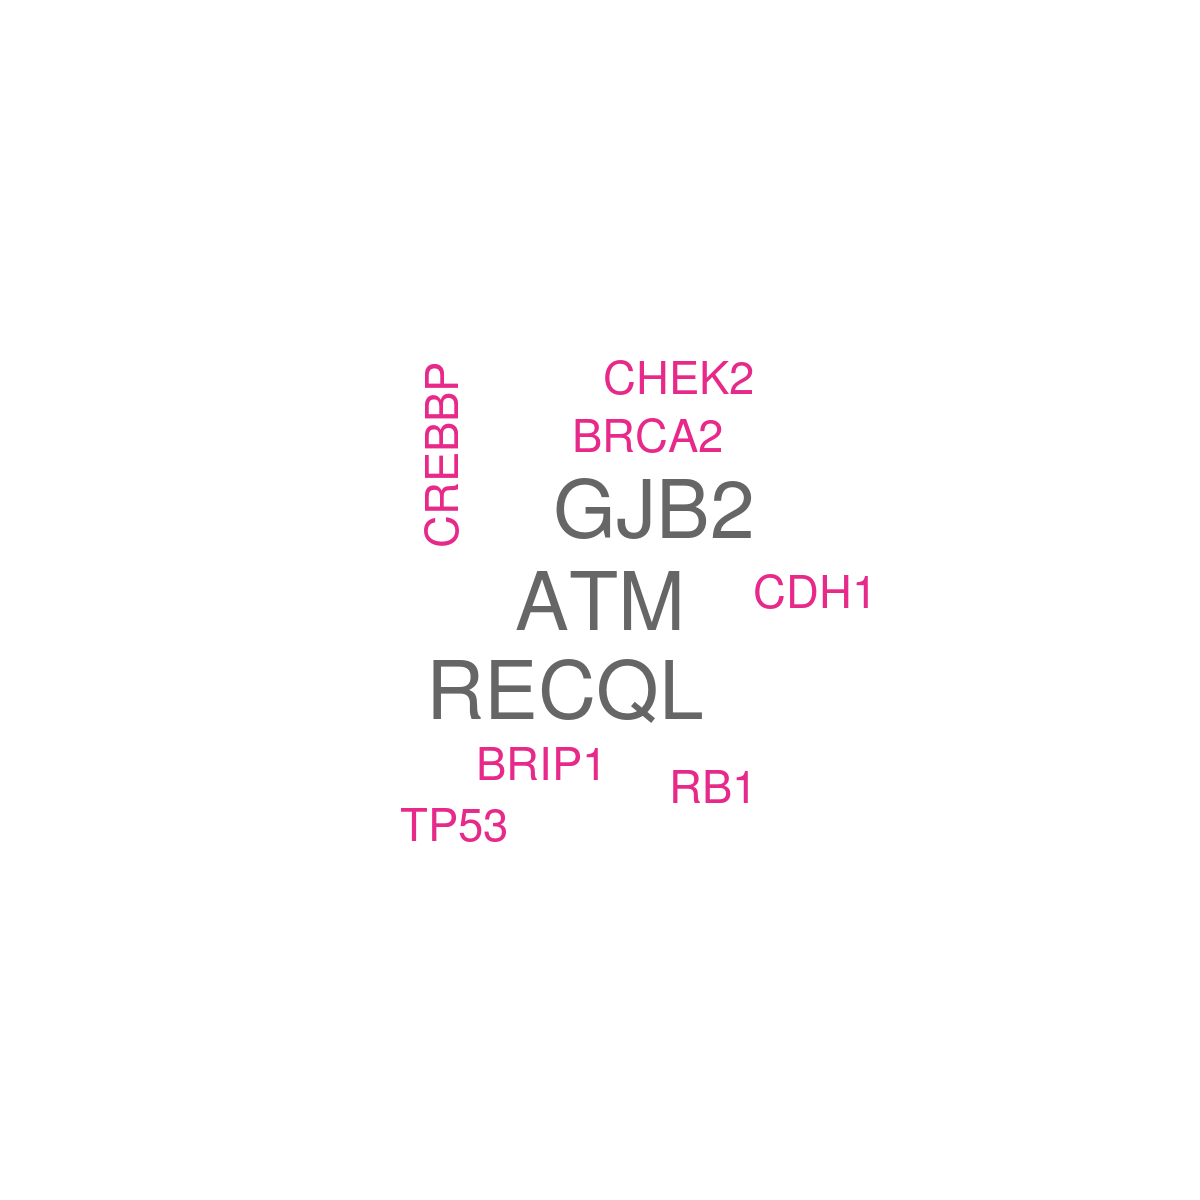

In [91]:
options(repr.plot.width=10, repr.plot.height=10)
gs = getGeneSummary(dfx)
gs = gs[MutatedSamples >=0]
set.seed(42)
wordcloud::wordcloud(words = gs[, Hugo_Symbol], gs[,MutatedSamples], 
           min.freq =1,
           max.words=50, 
          random.order=FALSE, 
          rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

In [92]:
options(repr.plot.width=10, repr.plot.height=10)

out_svg = paste0('../KCPG_Variants/plots/KCP_wo_AR_','TT-',gsub("'","", gsub(' ','_',ttype)),'_genecloud_02.svg')
paste0("Saving : ", out_svg)
svg(out_svg, height=9, width=12)
gs = getGeneSummary(dfx)
gs = gs[MutatedSamples >=0]
set.seed(42)
wordcloud::wordcloud(words = gs[, Hugo_Symbol], gs[,MutatedSamples], 
          min.freq = 1,
          # max.words=200, 
          random.order=FALSE, 
          rot.per=0.45, 
          colors=brewer.pal(8, "Dark2"))
dev.off()

[1] "Saving : ../KCPG_Variants/plots/KCP_wo_AR_TT-Osteosarcoma_genecloud_02.svg"

png 
  2

##  Drug Interactions
- plot shows potential druggable gene categories along with upto top 5 genes involved in them. 
- One can also extract information on drug-gene interactions. 
- [check this documentation](https://bioconductor.org/packages/release/bioc/vignettes/maftools/inst/doc/maftools.html#98_drug-gene_interactions)

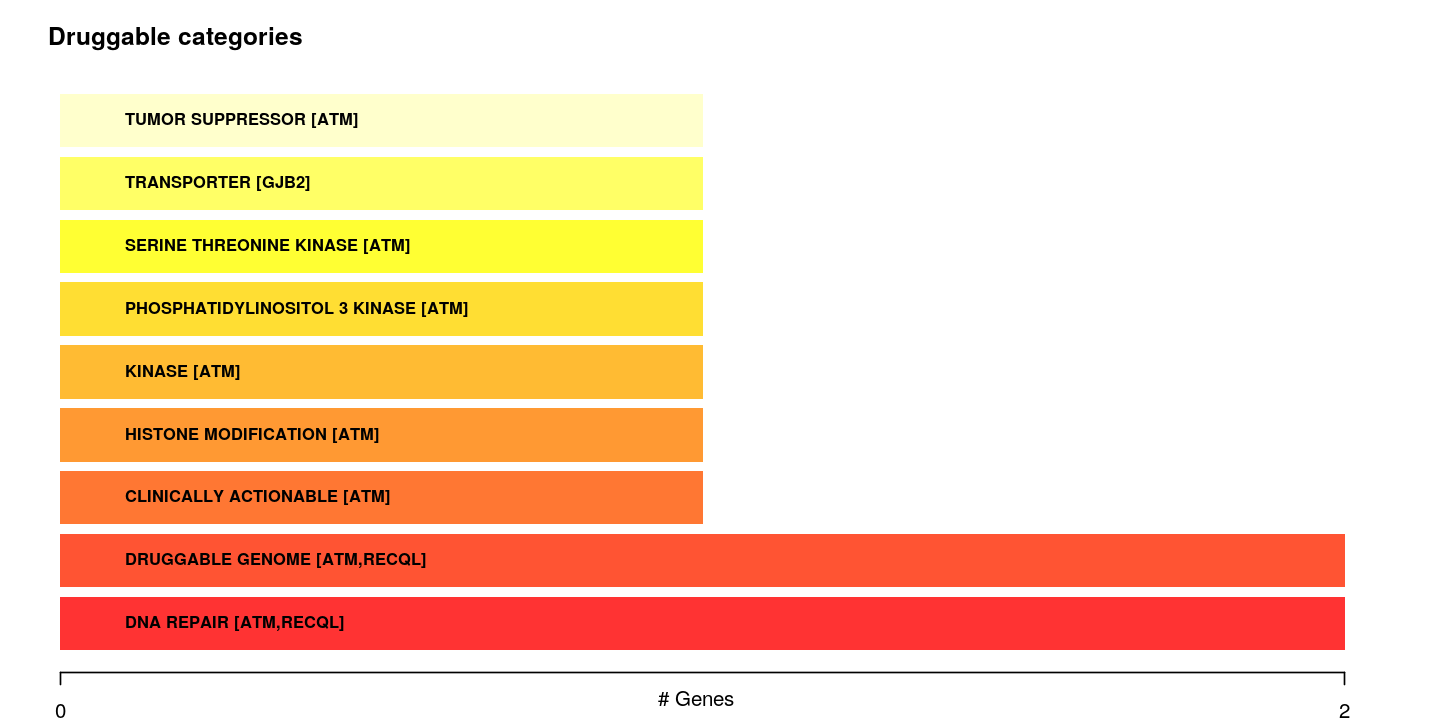

In [93]:
options(repr.plot.height=6, repr.plot.width=12)
dfx_drug =maftools::drugInteractions(dfx, top=gf_sx )

In [94]:
out_svg = paste0('../KCPG_Variants/plots/KCP_wo_AR_','TT-',gsub("'","", gsub(' ','_',ttype)),'_drugInteractions_01.svg')
paste0("Saving drug interaction svg to : ", out_svg)
svg(out_svg, height=9, width=12)
dfx_drug =maftools::drugInteractions(dfx, top=gf_sx)
dev.off()

[1] "Saving drug interaction svg to : ../KCPG_Variants/plots/KCP_wo_AR_TT-Osteosarcoma_drugInteractions_01.svg"

png 
  2

## Oncogenic Pathways

In [95]:
options(repr.plot.width=6, repr.plot.height=4)
op = OncogenicPathways(dfx)

Pathway alteration fractions


       Pathway  N n_affected_genes fraction_affected
 1:       TP53  6                3        0.50000000
 2: Cell_Cycle 15                1        0.06666667
 3:      NOTCH 71                1        0.01408451
 4:      Hippo 38                0        0.00000000
 5:        MYC 13                0        0.00000000
 6:       NRF2  3                0        0.00000000
 7:       PI3K 29                0        0.00000000
 8:    RTK-RAS 85                0        0.00000000
 9:   TGF-Beta  7                0        0.00000000
10:        WNT 68                0        0.00000000


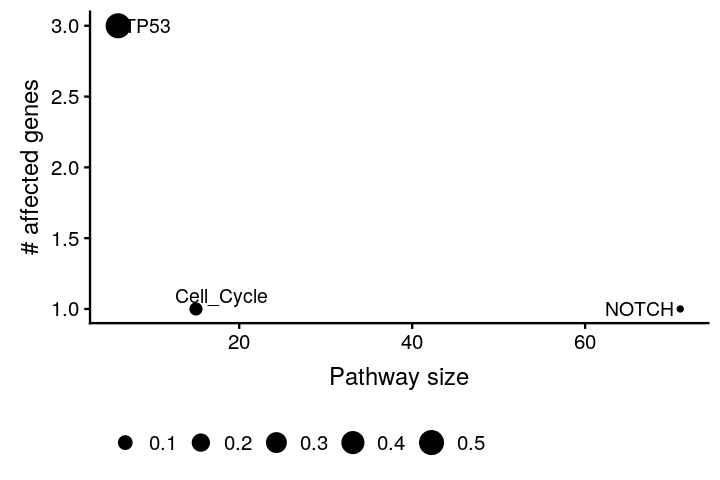

In [96]:
op

In [97]:
out_svg = paste0('../KCPG_Variants/plots/KCP_wo_AR_','TT-',gsub("'","", gsub(' ','_',ttype)),'_OncogenicPathway_01.svg')
paste0("Saving drug interaction svg to : ", out_svg)

svg(out_svg, height=9, width=12)
op
dev.off()

[1] "Saving drug interaction svg to : ../KCPG_Variants/plots/KCP_wo_AR_TT-Osteosarcoma_OncogenicPathway_01.svg"

png 
  2

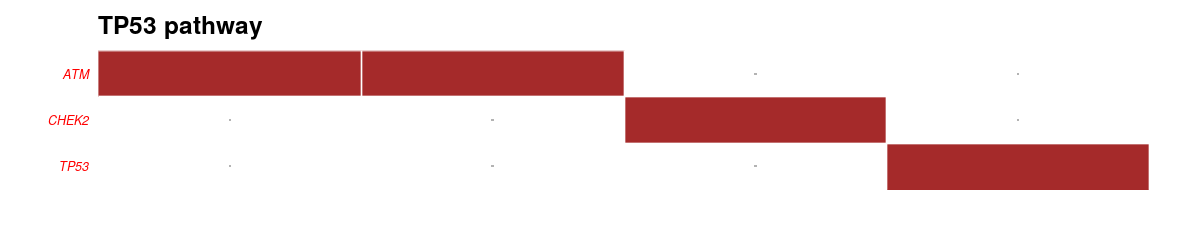

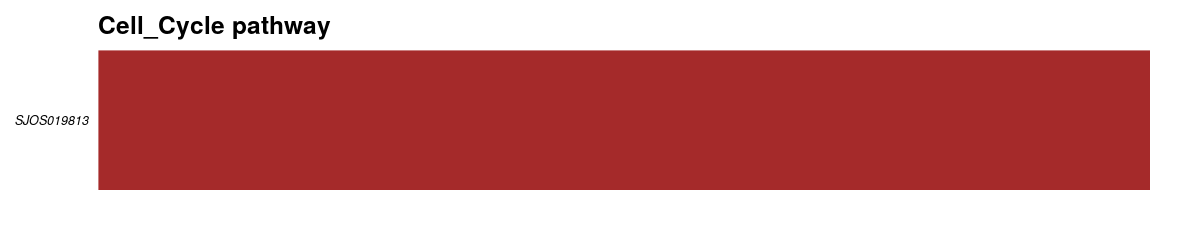

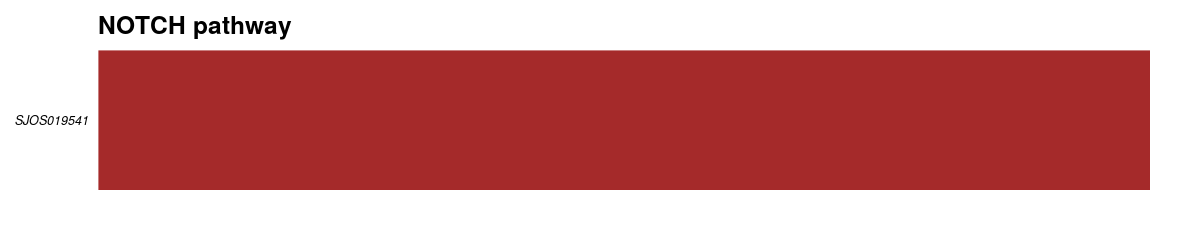

In [98]:
options(repr.plot.width=10, repr.plot.height=2)
for( i in 1:length( op$data$Pathway ) ){
    pway = op$data$Pathway[i]
    PlotOncogenicPathways(dfx,pway, fullPathway = F, removeNonMutated = T)
}

In [99]:
# pathway_lst = c("Cell_Cycle","Hippo","MYC","NOTCH","NRF2","PI3K","RTK-RAS","TGF-Beta","TP53","WNT")

In [100]:
# options(repr.plot.width=10, repr.plot.height=8)
# PlotOncogenicPathways(dfx,pathway_lst[10], fullPathway = T)

In [101]:
# options(repr.plot.width=10, repr.plot.height=3)
# PlotOncogenicPathways(dfx,pathway_lst[9], fullPathway = T)

In [102]:
# options(repr.plot.width=10, repr.plot.height=9)
# PlotOncogenicPathways(dfx,pathway_lst[7], fullPathway = T)

In [103]:
# options(repr.plot.width=10, repr.plot.height=3)
# PlotOncogenicPathways(dfx,pathway_lst[7], fullPathway = F, removeNonMutated = T)

## Save the MAF file

In [104]:
out_file = paste0('../KCPG_Variants/maf_res/KCP_wo_AR_','TT-',gsub("'","", gsub(' ','_',ttype)) )
paste0("Saving MAF file to : ", out_file)
maftools::write.mafSummary(dfx, out_file)

[1] "Saving MAF file to : ../KCPG_Variants/maf_res/KCP_wo_AR_TT-Osteosarcoma"

In [105]:
out_file = paste0('../KCPG_Variants/maf_res/KCP_wo_AR_','TT-',gsub("'","", gsub(' ','_',ttype)),'_drugInteractions.tsv')
paste0("Saving drug Interactions data to : ", out_file)
write.table(dfx_drug, out_file, sep="\t", row.names = F, quote = F)

[1] "Saving drug Interactions data to : ../KCPG_Variants/maf_res/KCP_wo_AR_TT-Osteosarcoma_drugInteractions.tsv"

## Save the data frames

In [106]:
out_file = paste0('../KCPG_Variants/data/KCP_wo_AR_','TT-',gsub("'","", gsub(' ','_',ttype)),"_mutation_data.tsv")
paste0("Saving mutation data to : ", out_file)
write.table(df_ss, file = out_file, sep="\t", quote = F, row.names = F)

[1] "Saving mutation data to : ../KCPG_Variants/data/KCP_wo_AR_TT-Osteosarcoma_mutation_data.tsv"

In [107]:
out_file = paste0('../KCPG_Variants/data/KCP_wo_AR_','TT-',gsub("'","", gsub(' ','_',ttype)),"_clinical_data.tsv")
paste0("Saving clinical data to : ", out_file)
write.table(df2_ss, file = out_file, sep="\t", quote = F, row.names = F)

[1] "Saving clinical data to : ../KCPG_Variants/data/KCP_wo_AR_TT-Osteosarcoma_clinical_data.tsv"

In [108]:
version

               _                           
platform       x86_64-redhat-linux-gnu     
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          5.0                         
year           2018                        
month          04                          
day            23                          
svn rev        74626                       
language       R                           
version.string R version 3.5.0 (2018-04-23)
nickname       Joy in Playing              

In [109]:
sessionInfo()

R version 3.5.0 (2018-04-23)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: Fedora 24 (Workstation Edition)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] wordcloud_2.6       RColorBrewer_1.1-2  knitr_1.22         
 [4] corrplot_0.84       maftools_1.8.0      Biobase_2.42.0     
 [7] BiocGenerics_0.28.0 vcd_1.4-4           ggpubr_0.2         
[10] magrittr_1.5        xtable_1.8-4        mixOmics_6.6.2     
[13] MASS_7.3-51.1       factoextra_1.0.5